<a href="https://colab.research.google.com/github/itskeiths/Basic-Calc-Flutter-/blob/main/stock_market_prediction_using_cnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model



In [1]:
import numpy as np 
import pandas as pd
import os

# Data Preprocessing and Analysis

In [2]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Before preprocessing data, a function to fetch real-time stock data (using Alpha Vantage API) is made

Then the datasets are loaded

In [3]:
data = pd.read_csv('OIL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-16,44.209999,44.209999,44.209999,44.209999,44.209999,600
1,2011-11-17,42.779999,42.799999,42.779999,42.799999,42.799999,1000
2,2011-11-18,42.180000,42.180000,42.180000,42.180000,42.180000,200
3,2011-11-21,42.180000,42.180000,42.180000,42.180000,42.180000,0
4,2011-11-22,42.180000,42.180000,42.180000,42.180000,42.180000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,25.215058,25.326369,25.091814,25.206734,25.206734,1.577590e+04
std,11.140466,11.144246,11.136433,11.140154,11.140154,6.823945e+04
min,7.520000,7.740000,7.170000,7.460000,7.460000,0.000000e+00
25%,16.497500,16.520000,16.469999,16.497500,16.497500,1.000000e+02
50%,20.415000,20.480000,20.300000,20.445001,20.445001,8.000000e+02
75%,37.130001,37.130001,36.982501,37.082500,37.082500,6.825000e+03
max,47.910000,48.009998,47.910000,47.939999,47.939999,1.754300e+06


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Filling null columns with mean values....

In [7]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-11-16,44.209999,44.209999,44.209999,44.209999,44.209999,600
1,2011-11-17,42.779999,42.799999,42.779999,42.799999,42.799999,1000
2,2011-11-18,42.180000,42.180000,42.180000,42.180000,42.180000,200
3,2011-11-21,42.180000,42.180000,42.180000,42.180000,42.180000,0
4,2011-11-22,42.180000,42.180000,42.180000,42.180000,42.180000,0


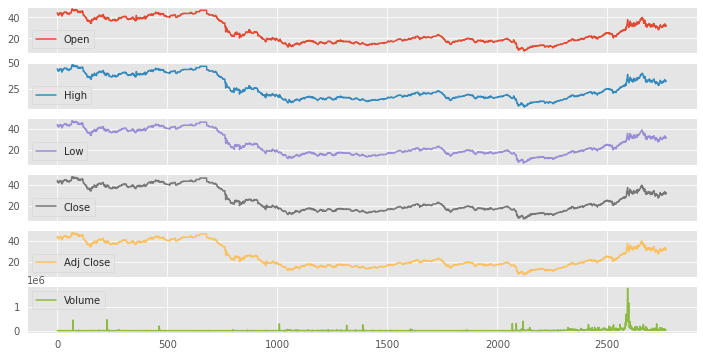

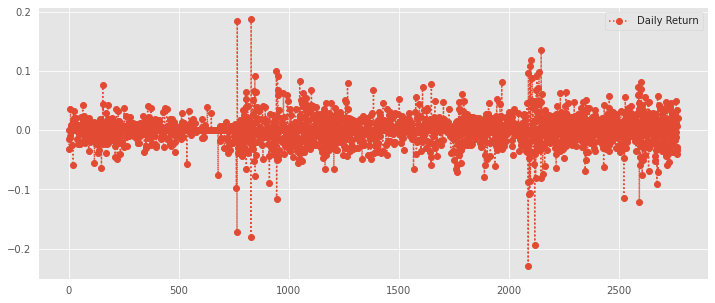

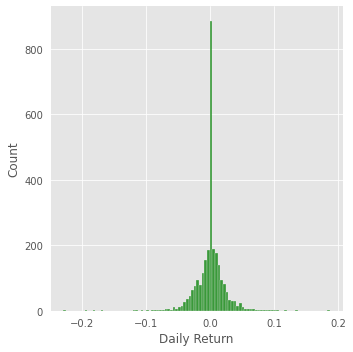

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


            Date       Open       High        Low      Close  Adj Close  \
0     2011-11-16  44.209999  44.209999  44.209999  44.209999  44.209999   
1     2011-11-17  42.779999  42.799999  42.779999  42.799999  42.799999   
2     2011-11-18  42.180000  42.180000  42.180000  42.180000  42.180000   
3     2011-11-21  42.180000  42.180000  42.180000  42.180000  42.180000   
4     2011-11-22  42.180000  42.180000  42.180000  42.180000  42.180000   
...          ...        ...        ...        ...        ...        ...   
2763  2022-11-09  31.910000  31.990000  31.160000  31.340000  31.340000   
2764  2022-11-10  31.290001  31.820000  31.020000  31.540001  31.540001   
2765  2022-11-11  32.430000  32.689999  32.150002  32.590000  32.590000   
2766  2022-11-14  32.230000  32.490002  31.260000  31.280001  31.280001   
2767  2022-11-15  31.270000  32.580002  31.240000  31.930000  31.930000   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0        600        2

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

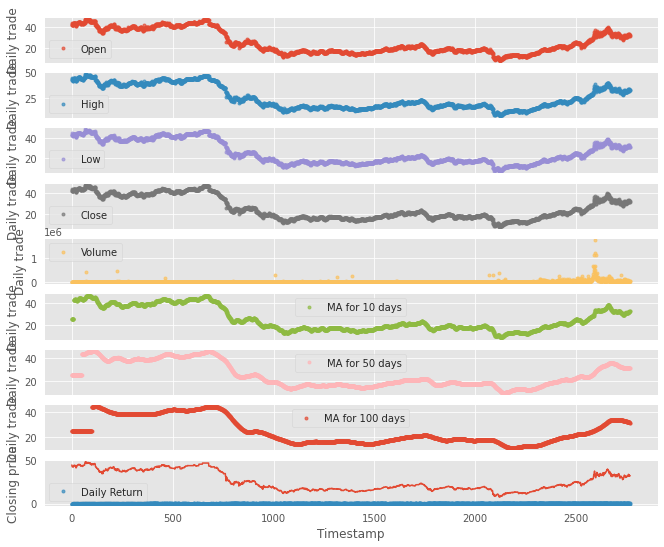

In [8]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days',
             'MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', 
                            figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)
data.isnull().sum()

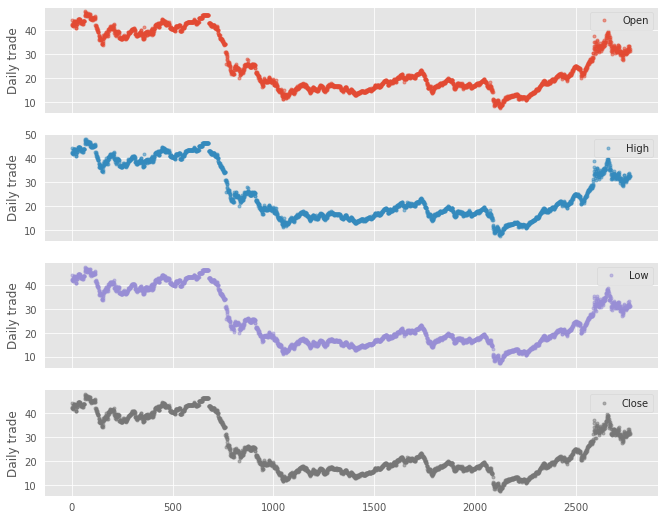

In [9]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5,
                            linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date       Open       High        Low      Close  Adj Close  \
0     2011-11-16  44.209999  44.209999  44.209999  44.209999  44.209999   
1     2011-11-17  42.779999  42.799999  42.779999  42.799999  42.799999   
2     2011-11-18  42.180000  42.180000  42.180000  42.180000  42.180000   
3     2011-11-21  42.180000  42.180000  42.180000  42.180000  42.180000   
4     2011-11-22  42.180000  42.180000  42.180000  42.180000  42.180000   
...          ...        ...        ...        ...        ...        ...   
2763  2022-11-09  31.910000  31.990000  31.160000  31.340000  31.340000   
2764  2022-11-10  31.290001  31.820000  31.020000  31.540001  31.540001   
2765  2022-11-11  32.430000  32.689999  32.150002  32.590000  32.590000   
2766  2022-11-14  32.230000  32.490002  31.260000  31.280001  31.280001   
2767  2022-11-15  31.270000  32.580002  31.240000  31.930000  31.930000   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0        600        2

,count,mean,std,min,25%,50%,75%,max
Open,2768.0,25.215058,11.140466,7.520000,16.497500,20.415000,37.130001,4.791000e+01
High,2768.0,25.326369,11.144246,7.740000,16.520000,20.480000,37.130001,4.801000e+01
Low,2768.0,25.091814,11.136433,7.170000,16.469999,20.300000,36.982501,4.791000e+01
Close,2768.0,25.206734,11.140154,7.460000,16.497500,20.445001,37.082500,4.794000e+01
Adj Close,2768.0,25.206734,11.140154,7.460000,16.497500,20.445001,37.082500,4.794000e+01
Volume,2768.0,15775.903179,68239.452184,0.000000,100.000000,800.000000,6825.000000,1.754300e+06
MA for 10 days,2768.0,25.167150,11.097329,7.963000,16.531000,20.466000,37.099750,4.695600e+01
MA for 50 days,2768.0,24.991039,10.905133,9.287800,16.359150,20.531000,37.395150,4.595440e+01
MA for 100 days,2768.0,24.751208,10.619616,10.581800,16.214750,20.334000,35.087675,4.481150e+01
Daily Return,2768.0,0.000153,0.023117,-0.229851,-0.006599,0.000000,0.008821,1.870000e-01


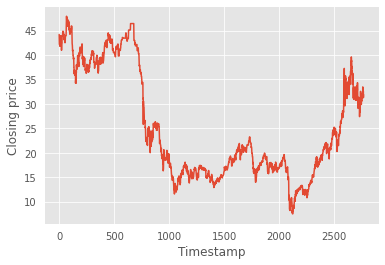

In [10]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [11]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2132
534


# Training part

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout,
 Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
model = tf.keras.Sequential()
model.add(TimeDistributed(Conv1D(64, kernel_size=3,
                                 activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3,
                                 activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3,
                                 activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))S
model.add(TimeDistributed(Flatten()))
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y),
                    epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
54/54 [==============================] - 15s 82ms/step - loss: 0.0137 - mse: 0.0137 - mae: 0.0866 - val_loss: 0.0068 - val_mse: 0.0068 - val_mae: 0.0612
Epoch 2/40
54/54 [==============================] - 2s 43ms/step - loss: 0.0066 - mse: 0.0066 - mae: 0.0619 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0502
Epoch 3/40
54/54 [==============================] - 2s 43ms/step - loss: 0.0049 - mse: 0.0049 - mae: 0.0536 - val_loss: 0.0042 - val_mse: 0.0042 - val_mae: 0.0487
Epoch 4/40
54/54 [==============================] - 2s 42ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0504 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0432
Epoch 5/40
54/54 [==============================] - 2s 43ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0496 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0464
Epoch 6/40
54/54 [==============================] - 2s 44ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0486 - val_loss: 0.0038 - val_mse: 0.0038 - val_mae: 0.0462
Epoch 7/40
54/54 [===

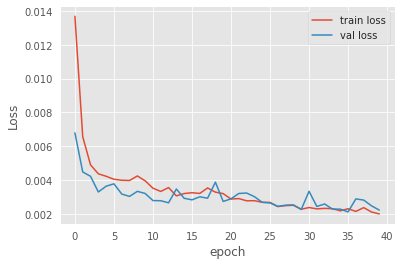

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

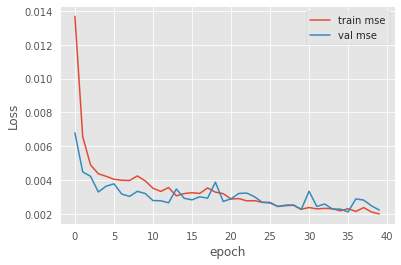

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

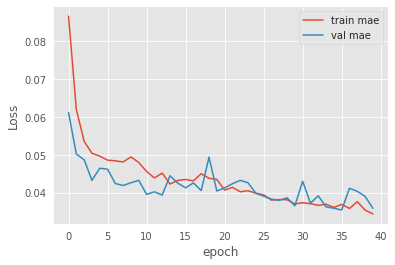

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

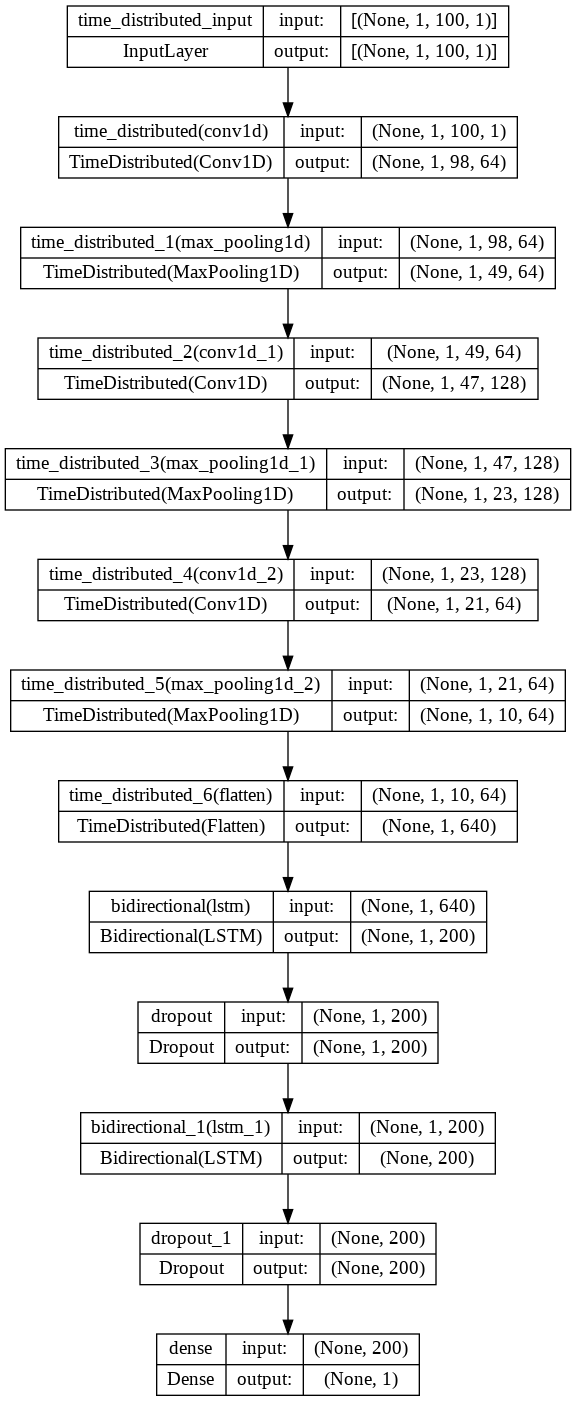

In [ ]:
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

17/17 [==============================] - 0s 14ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0358


[0.0022134699393063784, 0.0022134699393063784, 0.03583301976323128]

In [ ]:
from sklearn.metrics import explained_variance_score,
 mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.954468
R2 Score: 0.954468
Max Error: 0.296593


17/17 [==============================] - 0s 12ms/step


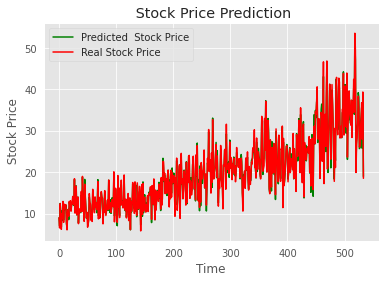

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing part

In [ ]:
model.save("model.h5")

In [ ]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

In [ ]:
data2 = pd.read_csv('OIL2.csv')
data2.dropna(inplace=True)
data2.head()
data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)
print(df2)
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)

    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


           Open       High        Low      Close  Adj Close  Volume
0     44.209999  44.209999  44.209999  44.209999  44.209999     600
1     42.779999  42.799999  42.779999  42.799999  42.799999    1000
2     42.180000  42.180000  42.180000  42.180000  42.180000     200
3     42.180000  42.180000  42.180000  42.180000  42.180000       0
4     42.180000  42.180000  42.180000  42.180000  42.180000       0
...         ...        ...        ...        ...        ...     ...
2763  31.910000  31.990000  31.160000  31.340000  31.340000   30200
2764  31.290001  31.820000  31.020000  31.540001  31.540001   22000
2765  32.430000  32.689999  32.150002  32.590000  32.590000   24400
2766  32.230000  32.490002  31.260000  31.280001  31.280001   36900
2767  31.270000  32.580002  31.240000  31.930000  31.930000   34800

[2768 rows x 6 columns]
2132
534


In [ ]:
model.evaluate(test_X, test_Y)

17/17 [==============================] - 0s 13ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0394


[0.0025578907225281, 0.0025578907225281, 0.03937338665127754]

17/17 [==============================] - 0s 13ms/step


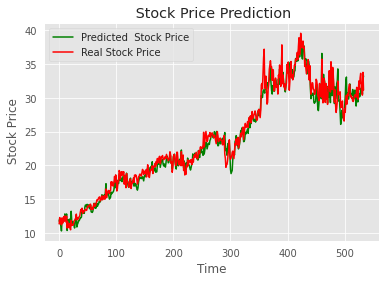

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
# Converting model from HDF5 format to TFJS format...
!pip install tensorflowjs[wizard]
# Need to be done on a CLI and not in notebook
!tensorflowjs_converter --input_format=keras /kaggle/working/model.h5 /kaggle/working/model-tjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 1.9 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 588.3 MB 5.7 kB/s 
     |████████████████████████████████| 189 kB 64.9 MB/s 
     |████████████████████████████████| 16.2 MB 26.1 MB/s 
     |████████████████████████████████| 248 kB 53.0 MB/s 
     |████████████████████████████████| 8.3 MB 47.9 MB/s 
     |████████████████████████████████| 154 kB 44.0 MB/s 
     |████████████████████████████████| 237 kB 63.8 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
     |████████████████████████████████| 6.0 MB 45.6 MB/s 
     |████████████████████████████████| 439 kB 55.5 MB/s 
     |████████████████████████████████| 1.7 MB 57.6 MB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-py3-none-any.whl size=32864 sha256=3e

2022-11-24 04:01:00.623802: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-24 04:01:00.624106: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-24 04:01:00.624137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.

# EDA

In [ ]:
dataX = pd.read_csv('./data.csv')
dataY = pd.read_csv('./data.csv')
dataX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
dataX.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-23,19.500000,19.670000,19.309999,19.430000,18.687626,13575300
1,2021-11-24,19.230000,19.530001,19.230000,19.389999,18.649155,13869000
2,2021-11-26,19.799999,19.830000,19.219999,19.379999,18.639538,13971900
3,2021-11-29,19.049999,19.200001,18.879999,19.150000,18.639538,17859600
4,2021-11-30,19.350000,19.760000,18.930000,18.990000,18.483803,21083000


In [ ]:
start_date = '2021-01-01'
end_date = '2022-11-29'

start = '2021-01-01'
end = '2022-01-01'

fill = (dataX['Date']>=start_date) & (dataX['Date']<=end_date)
dataX = dataX.loc[fill]
dataX

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-23,19.500000,19.670000,19.309999,19.430000,18.687626,13575300
1,2021-11-24,19.230000,19.530001,19.230000,19.389999,18.649155,13869000
2,2021-11-26,19.799999,19.830000,19.219999,19.379999,18.639538,13971900
3,2021-11-29,19.049999,19.200001,18.879999,19.150000,18.639538,17859600


In [ ]:
fill2 = (dataY['Date']>=start) & (dataY['Date']<=end)
dataY = dataY.loc[fill2]
dataY

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-23,19.500000,19.670000,19.309999,19.430000,18.687626,13575300
1,2021-11-24,19.230000,19.530001,19.230000,19.389999,18.649155,13869000
2,2021-11-26,19.799999,19.830000,19.219999,19.379999,18.639538,13971900
3,2021-11-29,19.049999,19.200001,18.879999,19.150000,18.639538,17859600
4,2021-11-30,19.350000,19.760000,18.930000,18.990000,18.483803,21083000
5,2021-12-01,19.090000,19.440001,18.379999,18.389999,17.899797,20550100
6,2021-12-02,18.360001,18.389999,17.940001,18.180000,17.695395,23330300
7,2021-12-03,18.200001,18.260000,17.830000,18.219999,17.734327,22027100
8,2021-12-06,18.110001,18.549999,18.030001,18.490000,17.997131,17623900
9,2021-12-07,18.510000,18.740000,18.410000,18.559999,18.065264,15898800


In [ ]:
dataX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000e+00
mean,19.395000,19.557500,19.159999,19.337499,18.653964,1.481895e+07
std,0.327261,0.268001,0.190963,0.126853,0.022895,2.034053e+06
min,19.049999,19.200001,18.879999,19.150000,18.639538,1.357530e+07
25%,19.185000,19.447501,19.134999,19.322499,18.639538,1.379558e+07
50%,19.365000,19.600001,19.225000,19.384999,18.644347,1.392045e+07
75%,19.575000,19.710000,19.250000,19.399999,18.658773,1.494382e+07
max,19.799999,19.830000,19.309999,19.430000,18.687626,1.785960e+07


In [ ]:
dataY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01
mean,18.534445,18.743333,18.307407,18.519630,18.001070,1.715233e+07
std,0.519321,0.529993,0.492385,0.462622,0.404470,5.013589e+06
min,17.700001,17.830000,17.270000,17.650000,17.179522,1.030610e+07
25%,18.240000,18.415000,17.980000,18.274999,17.787861,1.388930e+07
50%,18.430000,18.660000,18.270000,18.410000,17.919264,1.561540e+07
75%,18.770000,18.985000,18.399999,18.710000,18.211267,1.952760e+07
max,19.799999,19.830000,19.309999,19.430000,18.687626,3.067210e+07


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


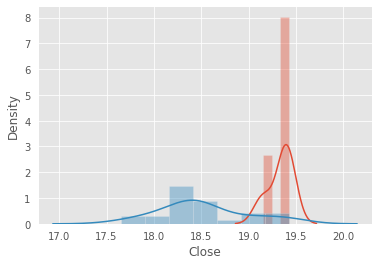

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

sns_plot = sns.distplot(dataX['Close'])
sns_plot2 = sns.distplot(dataY['Close'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

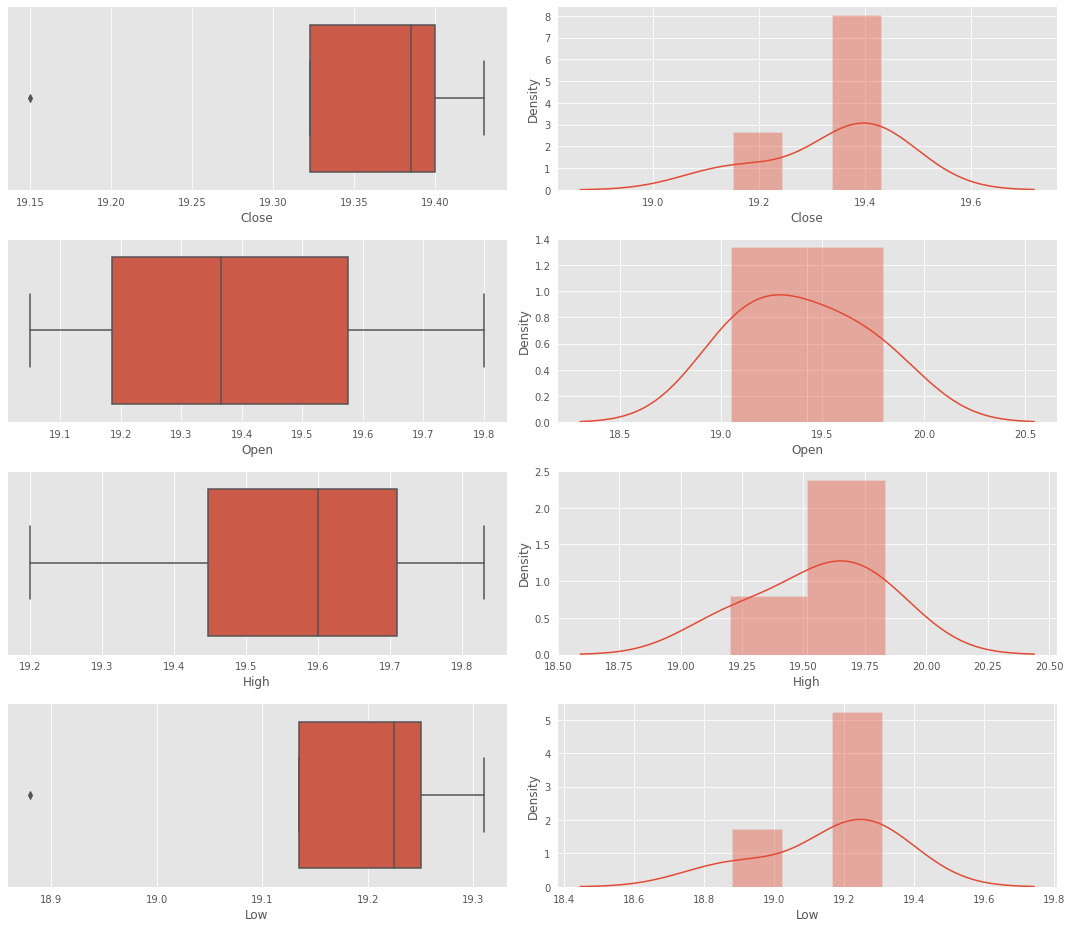

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataX["Close"], ax = ax[0,0])
sns.distplot(dataX['Close'], ax = ax[0,1])
sns.boxplot(x= dataX["Open"], ax = ax[1,0])
sns.distplot(dataX['Open'], ax = ax[1,1])
sns.boxplot(x= dataX["High"], ax = ax[2,0])
sns.distplot(dataX['High'], ax = ax[2,1])
sns.boxplot(x= dataX["Low"], ax = ax[3,0])
sns.distplot(dataX['Low'], ax = ax[3,1])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

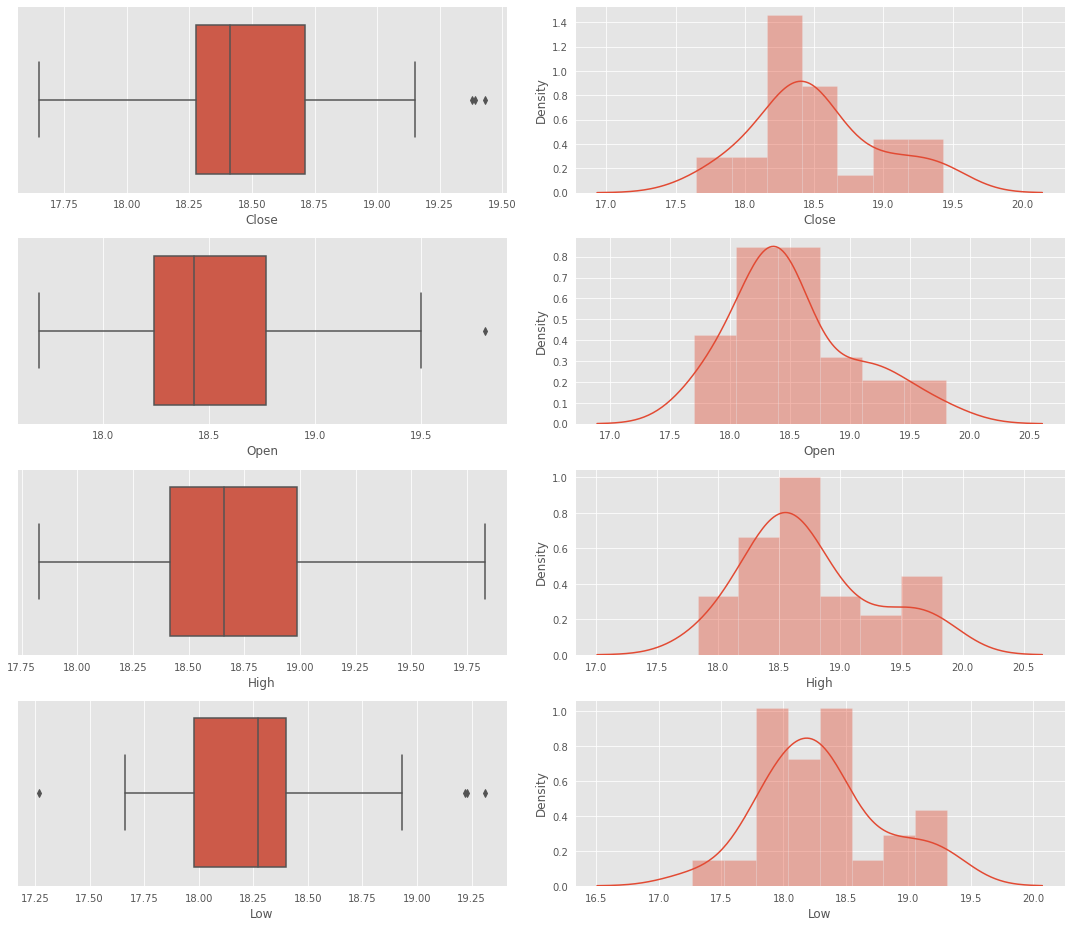

In [ ]:
fig, ax = plt.subplots(4, 2, figsize = (15, 13))
sns.boxplot(x= dataY["Close"], ax = ax[0,0])
sns.distplot(dataY['Close'], ax = ax[0,1])
sns.boxplot(x= dataY["Open"], ax = ax[1,0])
sns.distplot(dataY['Open'], ax = ax[1,1])
sns.boxplot(x= dataY["High"], ax = ax[2,0])
sns.distplot(dataY['High'], ax = ax[2,1])
sns.boxplot(x= dataY["Low"], ax = ax[3,0])
sns.distplot(dataY['Low'], ax = ax[3,1])
plt.tight_layout()

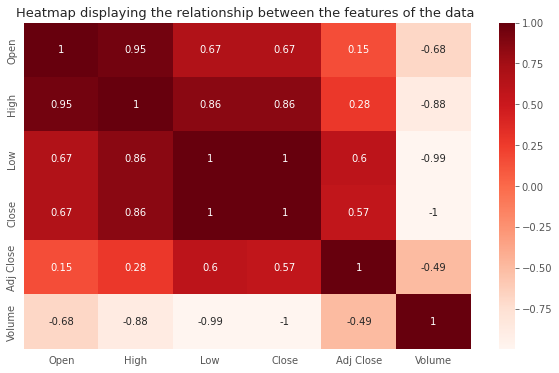

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataX.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data ',
         fontsize=13)
plt.show()